In [7]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [12]:
pwd

'C:\\Users\\User\\machine learning\\Bigdata'

In [14]:
ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6548-90B0

 C:\Users\User\machine learning\Bigdata\data 디렉터리

2020-12-24  오후 06:54    <DIR>          .
2020-12-24  오후 06:54    <DIR>          ..
2020-12-24  오후 06:54    <DIR>          .ipynb_checkpoints
2020-12-24  오후 06:53           105,382 전국_평균_분양가격_2018.6월_.csv
2020-12-24  오후 06:54           108,525 전국_평균_분양가격_2018.7월_.csv
               2개 파일             213,907 바이트
               3개 디렉터리  52,525,154,304 바이트 남음


In [17]:
pre_sale =pd.read_csv("data/전국_평균_분양가격_2018.7월_.csv",encoding="euc-kr")
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226


In [21]:
#Colums 데이터 정보
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2890 non-null   object
 1   규모구분     2890 non-null   object
 2   연도       2890 non-null   int64 
 3   월        2890 non-null   int64 
 4   분양가격(㎡)  2750 non-null   object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [23]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [24]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44508 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
C:\Users\User\anaconda3\lib\site-packages

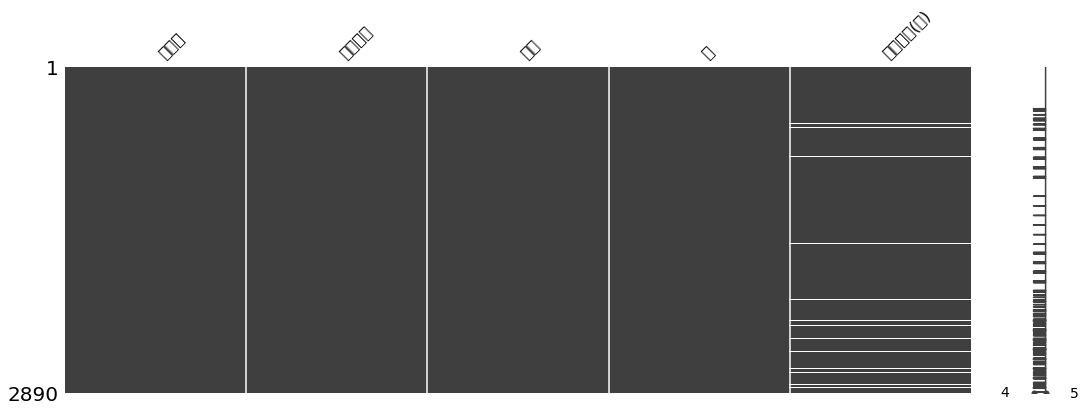

In [26]:
import missingno as msno
msno.matrix(pre_sale,figsize=(18,6))

In [28]:
pre_sale["연도"] = pre_sale["연도"].astype(str)
pre_sale["월"] = pre_sale["월"].astype(str)

In [30]:
pre_sale_price = pre_sale["분양가격(㎡)"]

In [33]:
#분양 가격의 타입을 숫자로 변경해 줍니다.
pre_sale["분양가격"] = pd.to_numeric(pre_sale_price,errors="coerce")
#평당 분양가격을 구해보자
pre_sale["평당분양가격"] = pre_sale["분양가격"] * 3.3
pre_sale.info()
pre_sale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   object 
 3   월        2890 non-null   object 
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB
